# Assignment 3
### Will Novak
### Due 9/23. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [3]:
import numpy as np
import pandas as pd

In [4]:
nhanes = pd.read_csv('data/nhanes_data_17_18.csv')
nhanes['smoking_na'] = nhanes['TriedToQuitSmoking'].isna() 
nhanes['loseweight_na'] = nhanes['TriedToLoseWeightInPastYear'].isna() 
print(nhanes['smoking_na'].value_counts())
print(nhanes['loseweight_na'].value_counts())

smoking_na
True     7380
False     986
Name: count, dtype: int64
loseweight_na
False    5087
True     3279
Name: count, dtype: int64


/var/folders/jt/l8_nr7mx5jnc_xwsnkl6d_q80000gn/T/ipykernel_13151/2935647118.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv('data/nhanes_data_17_18.csv')


There are more missing values for tried to quit smoking than those that tried to lose weight. This could possibly be do to less members of the data set who smoked initially. 

In [6]:
pd.crosstab(nhanes['TriedToQuitSmoking'], nhanes['TriedToLoseWeightInPastYear'], normalize='columns')

TriedToLoseWeightInPastYear,0.0,1.0
TriedToQuitSmoking,,
0.0,0.5313,0.371179
1.0,0.4687,0.628821


It's interesting to see a trend that people who tried to lose weight in the past year were more likely to try to quit smoking. Also, those who did not try to quit smoking were more likely not to try to lose weight.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

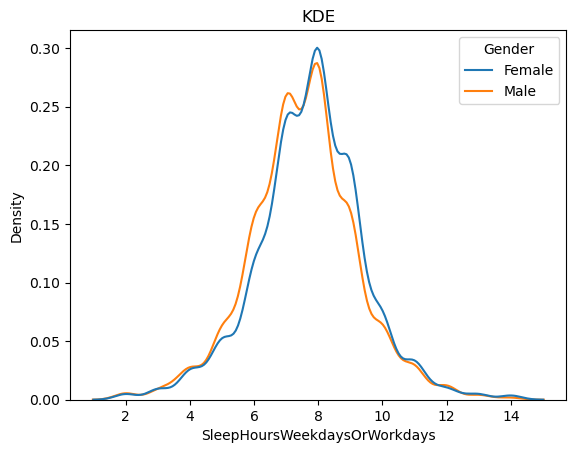

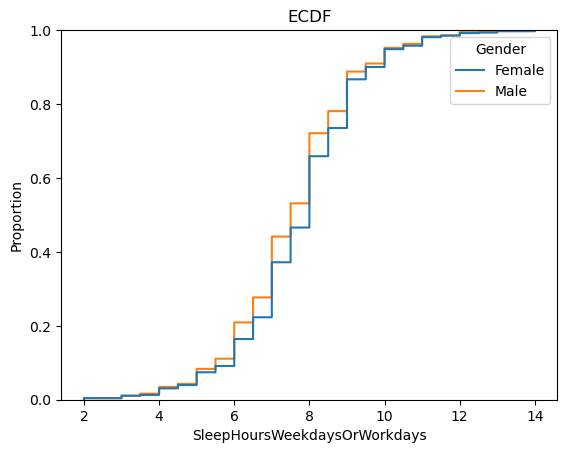

SleepHoursWeekdaysOrWorkdays                                          \
                              count      mean       std  min  25%  50%  75%   
Gender                                                                        
Female                       2990.0  7.746823  1.666573  2.0  7.0  8.0  9.0   
Male                         2793.0  7.531865  1.671399  2.0  6.5  7.5  8.5   

              
         max  
Gender        
Female  14.0  
Male    14.0

In [16]:
conditioner = 'Gender'
sns.kdeplot( data=nhanes, x='SleepHoursWeekdaysOrWorkdays', hue=conditioner, common_norm=False ).set(title='KDE')
plt.show()
sns.ecdfplot( data=nhanes, x='SleepHoursWeekdaysOrWorkdays', hue=conditioner).set(title='ECDF')
plt.show()
nhanes.loc[:,['SleepHoursWeekdaysOrWorkdays', conditioner]].groupby(conditioner).describe()

Both genders peak at around 7.5-8 hours of sleep. Females have a slightly higher median and slightly higher mean when it comes to sleep hours. The majority of participants in the data set cluster between 6 and 9 hours of sleep.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

### Step 1 – Differentiate the loss function
The mean squared error is  
$$
MSE(\hat y(z))=\frac{1}{N}\sum_{i=1}^N \bigl(y_i-\hat y(z)\bigr)^2 \,\frac{1}{h}k\!\left(\frac{z-x_i}{h}\right).
$$  
Treat $z$, $h$, and $k$ as constants. Differentiate term-by-term with respect to $\hat y(z)$:
$$
\frac{d}{d\hat y(z)}MSE
 = \frac{1}{N}\sum_{i=1}^N \frac{1}{h}k\!\left(\frac{z-x_i}{h}\right)
    \frac{d}{d\hat y(z)}\bigl(y_i-\hat y(z)\bigr)^2.
$$

---

### Step 2 – Apply the chain rule inside each term
$$
\frac{d}{d\hat y(z)}\bigl(y_i-\hat y(z)\bigr)^2
   = 2\bigl(y_i-\hat y(z)\bigr)\cdot(-1)
   = 2\bigl(\hat y(z)-y_i\bigr).
$$  
Thus,
$$
\frac{d}{d\hat y(z)}MSE
   = \frac{2}{N}\sum_{i=1}^N \frac{1}{h}k\!\left(\frac{z-x_i}{h}\right)\bigl(\hat y(z)-y_i\bigr).
$$

---

### Step 3 – Set derivative to zero and solve
Set the derivative to zero:
$$
0=\sum_{i=1}^N \frac{1}{h}k\!\left(\frac{z-x_i}{h}\right)\bigl(\hat y(z)-y_i\bigr).
$$  
Expand and find $\hat y(z)$:
$$
\hat y(z)\sum_{i=1}^N \frac{1}{h}k\!\left(\frac{z-x_i}{h}\right)
   =\sum_{i=1}^N \frac{1}{h}k\!\left(\frac{z-x_i}{h}\right)y_i.
$$  
Finally,
$$
\boxed{\hat y(z)=
 \frac{\displaystyle\sum_{i=1}^N \frac{1}{h}k\!\left(\frac{z-x_i}{h}\right) y_i}
      {\displaystyle\sum_{i=1}^N \frac{1}{h}k\!\left(\frac{z-x_i}{h}\right)}}.
$$

This is exactly the **Local Constant Least Squares / Nadaraya–Watson estimator**.


(Used ChatGPT to assist with markdown code. Did initial calculus with pen and paper)

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

,SystolicBloodPres1StRdgMmHg
AgeInYearsAtScreening,
1.0,NaN
2.0,NaN
3.0,NaN
4.0,NaN
5.0,NaN
...,...
76.0,136.358974
77.0,140.318182
78.0,144.324324


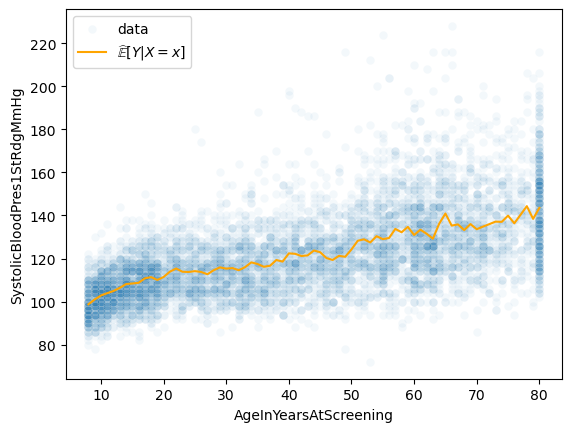

In [24]:
means = nhanes.loc[:,['SystolicBloodPres1StRdgMmHg','AgeInYearsAtScreening']].groupby('AgeInYearsAtScreening').mean()
sns.scatterplot(data=nhanes, y='SystolicBloodPres1StRdgMmHg', x='AgeInYearsAtScreening',alpha=.05, label='data')
sns.lineplot(data=means, x='AgeInYearsAtScreening',y='SystolicBloodPres1StRdgMmHg',color='orange', label='$\\widehat{\\mathbb{E}}[Y|X=x]$')

means

This relationship is possibly causal- as you age your blood pressure increases. There is a clear positive association displayed in the scatterplot. However, there are many other factors that contribute to your blood pressure. These tend to also change with age as well. Additionally, changes in lifestyle can likely influence blood pressure. 

Though there are many other variables at play, the model is still highly predictive in that given an age, you can roughly predict where your blood pressure should fall. 